### **Importing the libraries required for this project.**

In [7]:
# The Pandas library will be used for preprocessing and organizing text data into a data frame for further analysis.

import pandas as pd

In [8]:
# Numpy will be used for performing numerical computations on textual data converted into numerical vectors.

import numpy as np

In [9]:
# Seaborn will be used for data visualisation.

import seaborn as sns


In [10]:
# Matplotlib will be used for data visualisation.

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter

### **Reading in the data**

In [11]:
df = pd.read_csv('owid-energy-data.csv')



---



### **Inspecting the data**

In [12]:
# Viewing the first 10 rows of the dataset for a brief overview of the structure and composition of the DataFrame.

df.head(10)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,1905,AFG,5128808.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,1906,AFG,5195038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,1907,AFG,5262120.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,1908,AFG,5330065.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1909,AFG,5467828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




---



### **Data cleaning**

In [13]:
# Dropping the rows which correspond with the years between 1900 and 1984, where no data was tracked.

df = df.loc[df['year'] > 1985].copy()

In [14]:
# The dataset contains percentage values, which will skew the analysis.
# Dropping columns that contain percentage values.

df = df.filter(regex='^(?!.*(_change_pct|_change_twh|_per_capita|_share_elec|_share_energy)).*$')


In [15]:
# Identifying the remaining columns in the dataframe.

df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_consumption', 'biofuel_electricity', 'carbon_intensity_elec',
       'coal_consumption', 'coal_electricity', 'coal_production',
       'electricity_demand', 'electricity_generation', 'energy_per_gdp',
       'fossil_electricity', 'fossil_fuel_consumption', 'gas_consumption',
       'gas_electricity', 'gas_production', 'greenhouse_gas_emissions',
       'hydro_consumption', 'hydro_electricity', 'low_carbon_consumption',
       'low_carbon_electricity', 'net_elec_imports',
       'net_elec_imports_share_demand', 'nuclear_consumption',
       'nuclear_electricity', 'oil_consumption', 'oil_electricity',
       'oil_production', 'other_renewable_consumption',
       'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity', 'per_capita_electricity',
       'primary_energy_consumption', 'renewables_consumption',
       'renewables_electricity', 'solar_consumption', 'solar_electricity',
       'wi

In [16]:
# Viewing the first 10 rows of the dataset for a brief overview of the structure and composition of the DataFrame.

df.head(10)

,country,year,iso_code,population,gdp,biofuel_consumption,biofuel_electricity,carbon_intensity_elec,coal_consumption,coal_electricity,...,other_renewable_electricity,other_renewable_exc_biofuel_electricity,per_capita_electricity,primary_energy_consumption,renewables_consumption,renewables_electricity,solar_consumption,solar_electricity,wind_consumption,wind_electricity
86,Afghanistan,1986,AFG,10448447.0,1.764135e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.462,NaN,NaN,NaN,NaN,NaN,NaN
87,Afghanistan,1987,AFG,10322767.0,1.581082e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.483,NaN,NaN,NaN,NaN,NaN,NaN
88,Afghanistan,1988,AFG,10383459.0,1.449907e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.596,NaN,NaN,NaN,NaN,NaN,NaN
89,Afghanistan,1989,AFG,10673172.0,1.348950e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.052,NaN,NaN,NaN,NaN,NaN,NaN
90,Afghanistan,1990,AFG,10694804.0,1.306598e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31.746,NaN,NaN,NaN,NaN,NaN,NaN
91,Afghanistan,1991,AFG,10745168.0,1.204736e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.903,NaN,NaN,NaN,NaN,NaN,NaN
92,Afghanistan,1992,AFG,12057436.0,1.267754e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.168,NaN,NaN,NaN,NaN,NaN,NaN
93,Afghanistan,1993,AFG,14003764.0,9.834581e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.105,NaN,NaN,NaN,NaN,NaN,NaN
94,Afghanistan,1994,AFG,15455560.0,7.919857e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.816,NaN,NaN,NaN,NaN,NaN,NaN
95,Afghanistan,1995,AFG,16418911.0,1.230753e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.429,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replacing all NaN values with zero.

df = df.fillna(0)

# Printing the DataFrame with NaN values replaced.

print(df)



---



### **Creating a filtered dataframe showing only data for BRICS nations (including South Africa)**




In [18]:
# Filtering rows where 'country' column contains 'South Africa', 'Brazil', 'China', 'Russia' and 'India'.

brics_df = df[df['country'].isin(['South Africa', 'Brazil', 'China', 'Russia', 'India'])]



---



### **Creating a filtered dataframe showing only data for South Africa**




In [19]:
# Filtering rows where 'country' column contains 'South Africa'.

sa_df = df[df['country'].isin(['South Africa'])]

In [20]:
# Retrieving the dimensions of the dataframe.
sa_df.shape

(36, 42)

In [21]:
# Exporting the output to csv.

sa_df.to_csv('south_africa.csv', index=False)



---



### **DATA STORY**



---





### **SA'S ENERGY MIX**

What are the dominant energy sources in South Africa's electricity mix, and how have they evolved?


### **Topline Metrics: Calculations for visualisation**



In [22]:
# Calculating the total 'biofuel_electricity' count.

biofuel = sa_df['biofuel_electricity'].sum()

# Rounding to 2 decimal places.

biofuel = round(biofuel, 2)

print(biofuel)

8.72


In [23]:
# Calculating the total 'coal_electricity' count.

coal = sa_df['coal_electricity'].sum()

# Rounding to 2 decimal places.

coal = round(coal, 2)

print(coal)

6930.2


In [24]:
# Calculating the total 'gas_electricity' count.

gas = sa_df['gas_electricity'].sum()

# Rounding to 2 decimal places.

gas = round(gas, 2)

print(gas)

12.96


In [25]:
# Calculating the 'hydro_electricity' count.

hydro = sa_df['hydro_electricity'].sum()

# Rounding to 2 decimal places.

hydro = round(hydro, 2)

print(hydro)

49.84


In [26]:
# Calculating the 'nuclear_electricity' count.

nuclear = sa_df['nuclear_electricity'].sum()

# Rounding to 2 decimal places.

nuclear = round(nuclear, 2)

print(nuclear)

420.26


In [27]:
# Calculating the 'solar_electricity' count.

solar = sa_df['solar_electricity'].sum()

# Rounding to 2 decimal places.

solar = round(nuclear, 2)

print(solar)

420.26


In [28]:
# Calculating the 'wind_electricity' count.

wind = sa_df['wind_electricity'].sum()

# Rounding to 2 decimal places.

wind = round(wind, 2)

print(wind)


39.79


In [29]:
# Calculating the 'other_renewable_electricity' count.
other_renewables = sa_df['other_renewable_electricity'].sum()

# Rounding to 2 decimal places.

other_renewables = round(other_renewables, 2)

print(other_renewables)


9.35


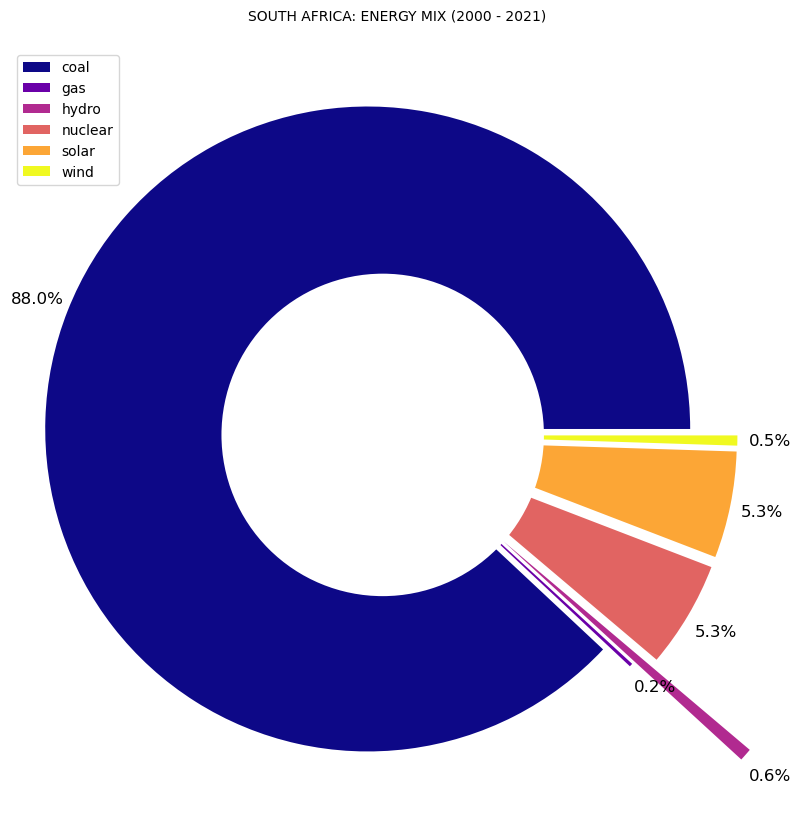

In [43]:
# Setting labels for items in the chart.
labels = ['coal', 'gas', 'hydro', 'nuclear', 'solar', 'wind']

# Setting size in the chart based on given values.
sizes = [6930.20, 12.96, 49.84, 420.26, 420.26, 39.79]

# Adding spaces between the wedges.
explode = (0.05, 0.05, 0.50, 0.10, 0.10, 0.10)

# Create a pie chart.
fig, ax = plt.subplots(figsize=(10, 10))

# Define the colors using the 'plasma' colormap.
colors = plt.cm.plasma(np.linspace(0, 1, len(sizes)))

# Plot the pie chart with the defined colors.
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', pctdistance=1.1, explode=explode, colors=colors)

# Increasing the size of the autopct labels.
for autotext in autotexts:
    autotext.set_fontsize(12)

# Draw a white circle at the center (to create a donut chart).
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.axis('equal')

# Adding a legend.
plt.legend(wedges, labels, loc='upper left')

# Adding the title of the chart.
plt.title('SOUTH AFRICA: ENERGY MIX (2000 - 2021)', fontsize=10, pad=20)

plt.show()




---



### **ENERGY MIX OVER TIME**

How has the electricity generation from renewable sources, excluding biofuels, changed over time in South Africa?


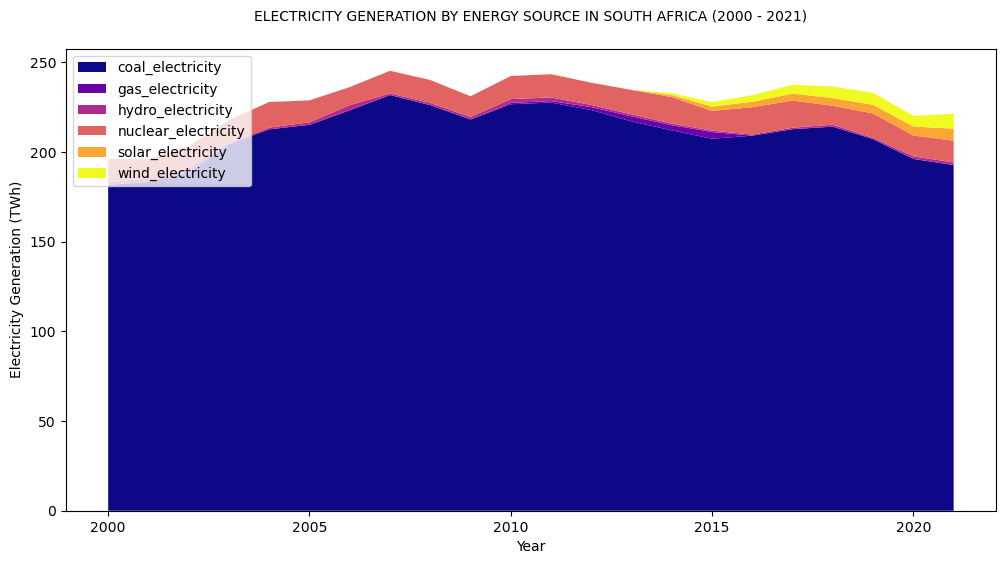

In [61]:
# Selecting columns for stacked area plot.
energy_sources = ['coal_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 
                  'solar_electricity', 'wind_electricity']

# Getting the number of energy sources.
num_sources = len(energy_sources)

# Generating a range of colours from the 'plasma' colormap.
colors = plt.cm.plasma(np.linspace(0, 1, num_sources))

# Plotting stacked area chart.
plt.figure(figsize=(12, 6))
plt.stackplot(sa_df['year'], [sa_df[column] for column in energy_sources], labels=energy_sources, colors=colors)
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('ELECTRICITY GENERATION BY ENERGY SOURCE IN SOUTH AFRICA (2000 - 2021)', fontsize=10, pad=20)
plt.legend(loc='upper left')
plt.show()




---



### **ENERGY DEMAND OVER TIME**

How has the electricity demand in South Africa changed over time?


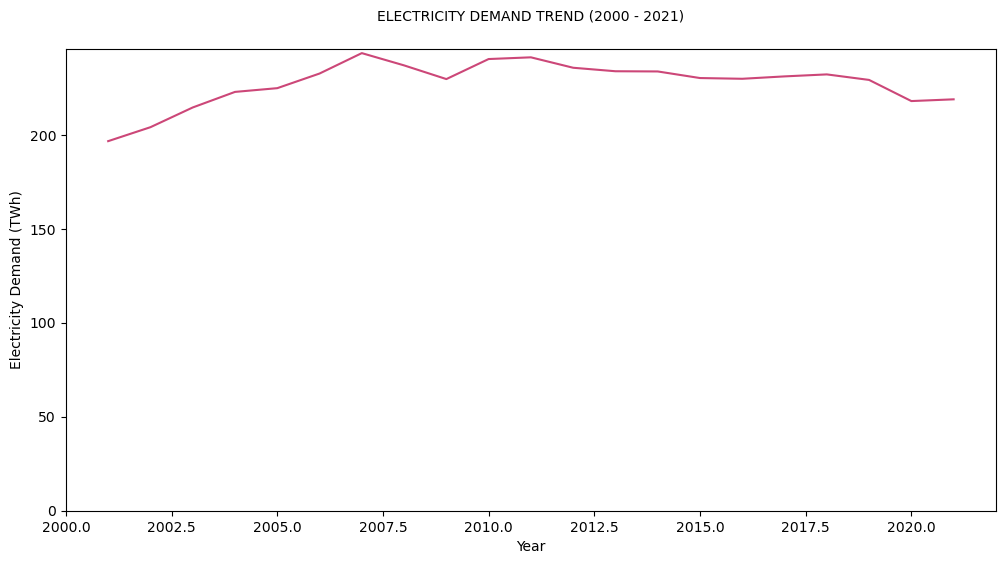

In [71]:
# Filtering dataframe for years from 2000 to 2021.
sa_df = sa_df[(sa_df['year'] >= 2001) & (sa_df['year'] <= 2022)]

# Choosing a color from the plasma colormap.
color = plt.cm.plasma(0.5)  

# Plotting electricity generation trends over time.
plt.figure(figsize=(12, 6))
plt.plot(sa_df['year'], sa_df['electricity_demand'], color=color)
plt.xlabel('Year')
plt.ylabel('Electricity Demand (TWh)')
plt.title('ELECTRICITY DEMAND TREND (2000 - 2021)', fontsize=10, pad=20)

# Setting the lower limit of the y-axis to zero.
plt.ylim(bottom=0)

plt.show()




---



### **PROGRESS TOWARDS ENERGY TRANSITION TARGETS (2000 - 2040)**




---



**100% clean energy by 2040**<br>
The share of energy production by 2021 is just 3.2%

In [46]:
#Verifying that the 2021 data exists in the dataframe.
print(2021 in sa_df['year'].values)


True


In [47]:
# Creating a new column 'renewable_electricity' that is the sum of the columns for the renewable sources 'biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity', 'other_renewable_electricity'.
renewable_sources = ['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity', 'other_renewable_electricity']


#Creating another new column 'non_renewable_electricity' that is the sum of the columns for the non-renewable sources.
non_renewable_sources = ['coal_electricity', 'gas_electricity', 'nuclear_electricity', 'oil_electricity']


#Creating two more columns 'renewable_share' and 'non_renewable_share' which are the proportions of 'renewable_electricity' and 'non_renewable_electricity' out of the total electricity.
# Calculating total electricity for renewable and non-renewable sources.
sa_df['renewable_electricity'] = sa_df[renewable_sources].sum(axis=1)
sa_df['non_renewable_electricity'] = sa_df[non_renewable_sources].sum(axis=1)

# Calculating total electricity.
sa_df['total_electricity'] = sa_df['renewable_electricity'] + sa_df['non_renewable_electricity']

# Calculating shares.
sa_df['renewable_share'] = sa_df['renewable_electricity'] / sa_df['total_electricity']
sa_df['non_renewable_share'] = sa_df['non_renewable_electricity'] / sa_df['total_electricity']


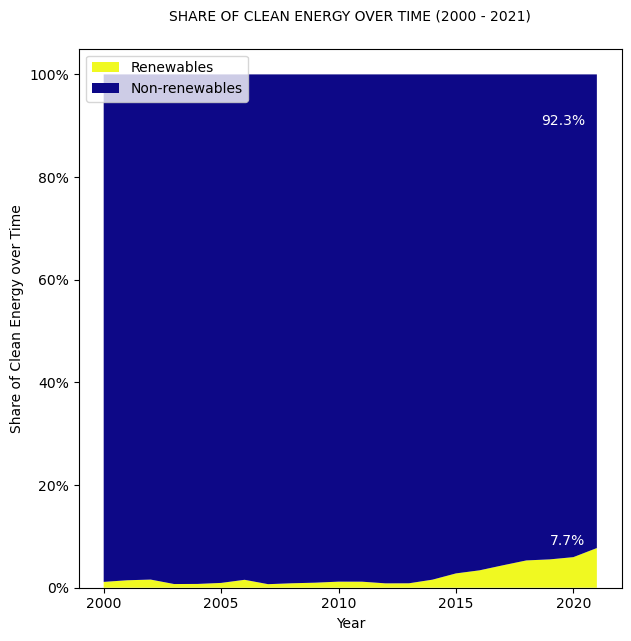

In [58]:
# Getting the share of renewables and non-renewables in 2021.
renewable_share_2021 = sa_df.loc[sa_df['year'] == 2021, 'renewable_share'].values[0]
non_renewable_share_2021 = sa_df.loc[sa_df['year'] == 2021, 'non_renewable_share'].values[0]

# Plotting the shares over time.
fig, ax = plt.subplots(figsize=(7, 7))
plt.stackplot(sa_df['year'], sa_df['renewable_share'], sa_df['non_renewable_share'], labels=['Renewables', 'Non-renewables'], colors=plt.cm.plasma_r(np.linspace(0, 1, 2)))
plt.xlabel('Year')
plt.ylabel('Share of Clean Energy over Time')

plt.title('SHARE OF CLEAN ENERGY OVER TIME (2000 - 2021)', fontsize=10, pad=20)

plt.legend(loc='upper left')

# Setting the formatter for y-axis ticks
formatter = StrMethodFormatter('{x:.0%}')
ax.yaxis.set_major_formatter(formatter)

# Annotating the plot with the share of renewables and non-renewables in 2021.
plt.text(2020.5, renewable_share_2021, f'{renewable_share_2021*100:.1f}%', ha='right', va='bottom', fontsize=10, color='white')
plt.text(2020.5, non_renewable_share_2021, f'{non_renewable_share_2021*100:.1f}%', ha='right', va='top', fontsize=10, color='white')

plt.show()



---




**No coal or fossil fuels by 2040**<br>
The share of coal energy production by 2020 is 86.19%

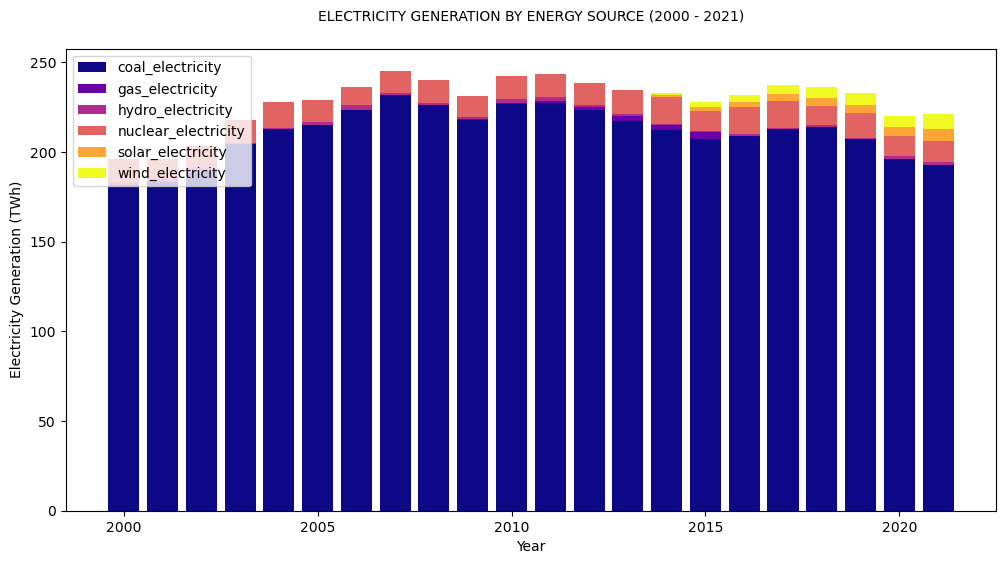

In [63]:
# Selecting columns for stacked bar plot.
energy_sources = ['coal_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'solar_electricity', 'wind_electricity']

# Getting the number of energy sources.
num_sources = len(energy_sources)

# Generating a range of colours from the 'plasma' colormap.
colors = plt.cm.plasma(np.linspace(0, 1, num_sources))

# Getting the years. 
years = sa_df['year']

# Plotting stacked bar chart. 
plt.figure(figsize=(12, 6))
bottom = np.zeros(len(years))  # Starting position for each bar

# Iterating over each energy source and plotting a stacked bar. 
for i, source in enumerate(energy_sources):
    plt.bar(years, sa_df[source], bottom=bottom, label=source, color=colors[i])
    
    # Updating the starting position for the next bar
    bottom += sa_df[source]  

plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')

plt.title('ELECTRICITY GENERATION BY ENERGY SOURCE (2000 - 2021)', fontsize=10, pad=20)

plt.legend(loc='upper left')
plt.show()




---




**Zero carbon intensity by 2040**<br>
The emissions intensity of electricity production (gC02eq/kWh) is 708.99 in 2022.
Carbon intensity is measured in grams of carbon dioxide-equivalents emitted per kilowatt-hour of electricity.

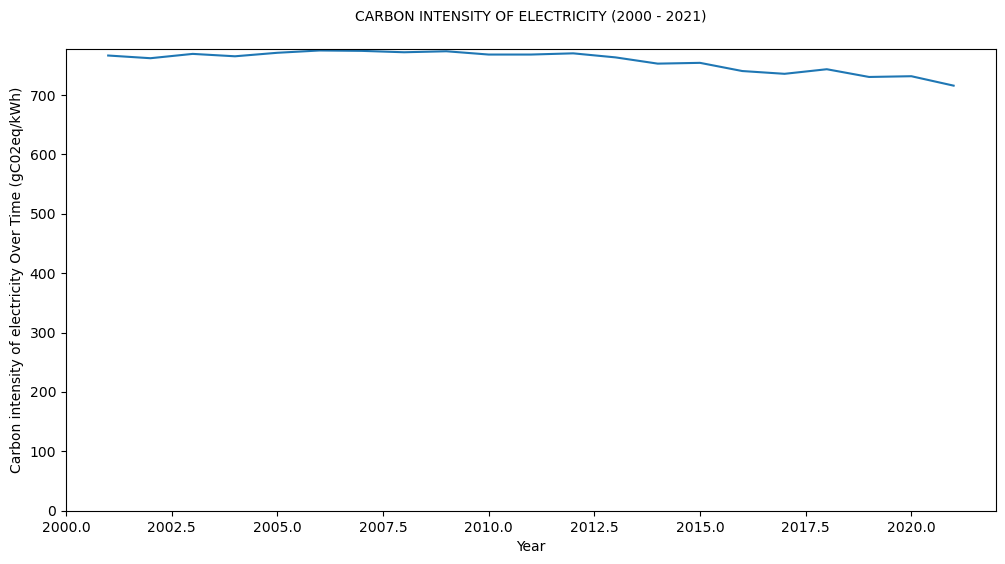

In [65]:
# Filtering the dataframe for years from 2000 to 2021. 
sa_df = sa_df[(sa_df['year'] >= 2001) & (sa_df['year'] <= 2022)]

# Choosing a color from the plasma colormap. 
color = plt.cm.plasma(0.5)  

# Plotting electricity generation trends over time. 
plt.figure(figsize=(12, 6))
plt.plot(sa_df['year'], sa_df['carbon_intensity_elec'])
plt.xlabel('Year')
plt.ylabel('Carbon intensity of electricity Over Time (gC02eq/kWh)')

plt.title('CARBON INTENSITY OF ELECTRICITY (2000 - 2021)', fontsize=10, pad=20)

# Setting the lower limit of the y-axis to zero.
plt.ylim(bottom=0)

plt.show()





---



### **GREENHOUSE GAS EMMISIONS PRODUCED IN THE GENERATION OF ELECTRICITY**

What is the trend in greenhouse gas emissions produced in the generation of electricity in South Africa?

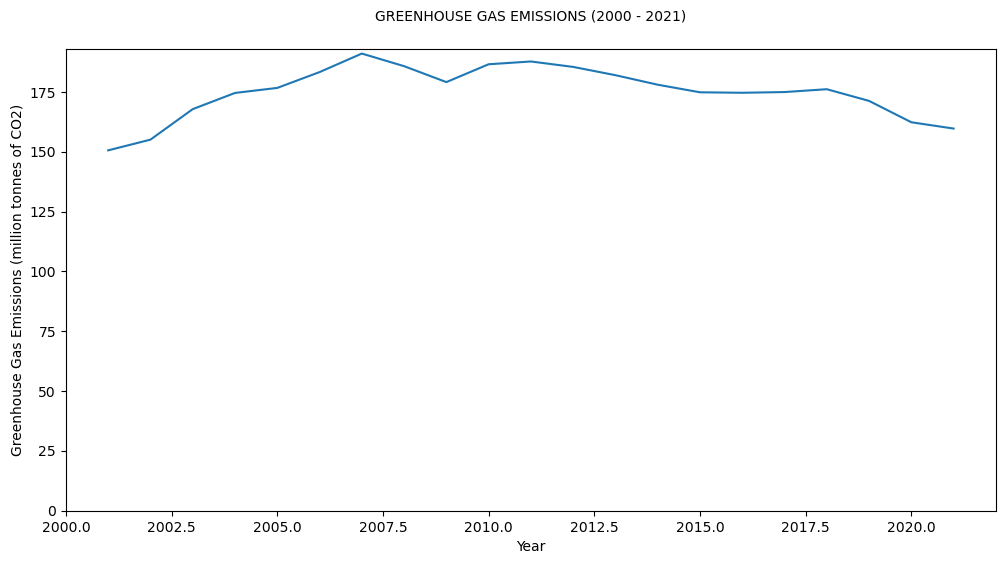

In [66]:
# Filtering the dataframe for years from 2000 to 2021.  
sa_df = sa_df[(sa_df['year'] >= 2001) & (sa_df['year'] <= 2022)]

# Choosing a colour from the plasma colormap. 
color = plt.cm.plasma(1)  

# Plotting electricity generation trends over time.
plt.figure(figsize=(12, 6))
plt.plot(sa_df['year'], sa_df['greenhouse_gas_emissions'])
plt.xlabel('Year')
plt.ylabel('Greenhouse Gas Emissions (million tonnes of CO2)')

plt.title('GREENHOUSE GAS EMISSIONS (2000 - 2021)', fontsize=10, pad=20)

# Set the lower limit of the y-axis to zero.
plt.ylim(bottom=0)

plt.show()





---



### **CORRELATION HEATMAP: GREENHOUSE GAS EMISSIONS**

What is the relationship between renewable energy adoption and greenhouse gas emissions produced in the generation of electricity in South Africa?


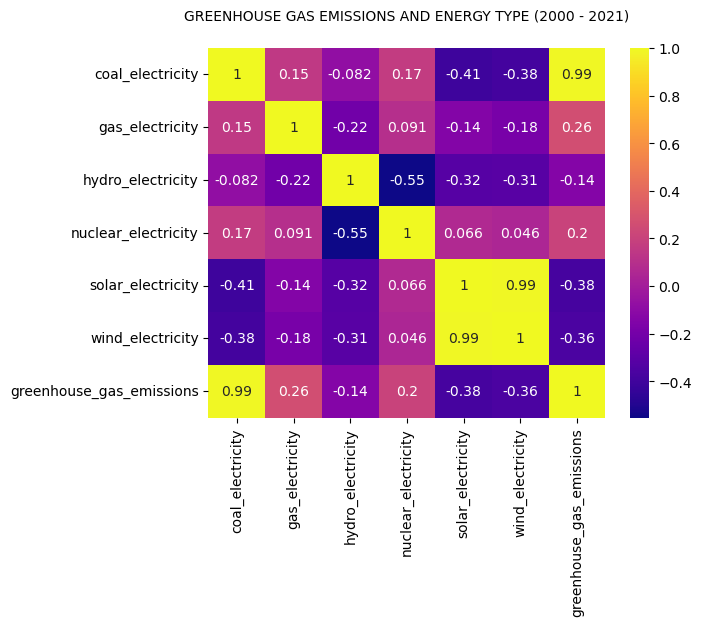

In [67]:
# Selecting relevant columns for correlation heatmap.
correlation = ['coal_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'solar_electricity', 'wind_electricity', 'greenhouse_gas_emissions']

# Computing correlation matrix. 
corr_matrix = sa_df[correlation].corr()

# Plotting the correlation heatmap.
sns.heatmap(corr_matrix, annot=True, cmap='plasma')

plt.title('GREENHOUSE GAS EMISSIONS AND ENERGY TYPE (2000 - 2021)', fontsize=10, pad=20)

plt.show()



---



### **ENERGY DEMAND VS GENERATION: ALL BRICS MEMBER NATIONS**

Are there any notable differences in power generation patterns between South Africa and other BRICS nations?


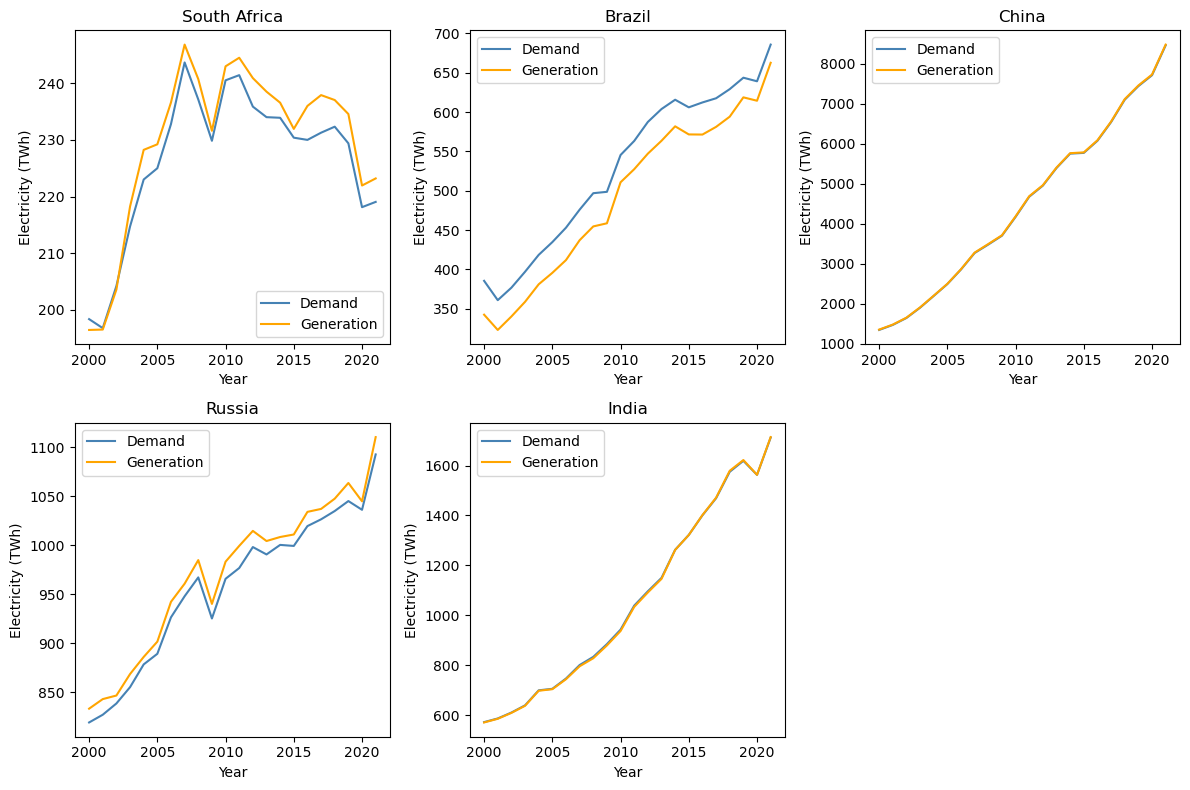

In [69]:
# List of countries.
countries = ['South Africa', 'Brazil', 'China', 'Russia', 'India']

# Setting the number of rows and columns for the subplot grid.
num_rows = 2  # Number of rows
num_cols = 3  # Number of columns

# Creating a new figure and set the size.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Generating a range of colours from the 'plasma' colormap.
colors = plt.cm.plasma(np.linspace(0, 1, num_sources))

# Iterating over the countries and create a line chart for each.
for i, country in enumerate(countries):
    # Get the data for the current country
    country_data = brics_df[brics_df['country'] == country]
    country_data = country_data[country_data['year'] >= 2000]

    # Determining the subplot position.
    row = i // num_cols
    col = i % num_cols

    # Plotting the electricity demand and generation as line charts on the corresponding subplot.
    sns.lineplot(x='year', y='electricity_demand', data=country_data, ax=axes[row, col], color='steelblue', label='Demand')
    sns.lineplot(x='year', y='electricity_generation', data=country_data, ax=axes[row, col], color='orange', label='Generation')

    # Setting the title for each subplot.
    axes[row, col].set_title(country)

    # Setting the x-axis and y-axis labels for each subplot.
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Electricity (TWh)')

    # Adding a legend to the subplot.
    axes[row, col].legend()

# Removing the extra subplots.
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes.flatten()[j])
    
# Adjusting the spacing between subplots.
plt.tight_layout()

# Showing the plot.
plt.show()




---



### **SOUTH AFRICA'S ENERGY MIX VS. OTHER BRICS NATIONS**

How does South Africa's energy mix compare to other BRICS countries in terms of renewable energy adoption?

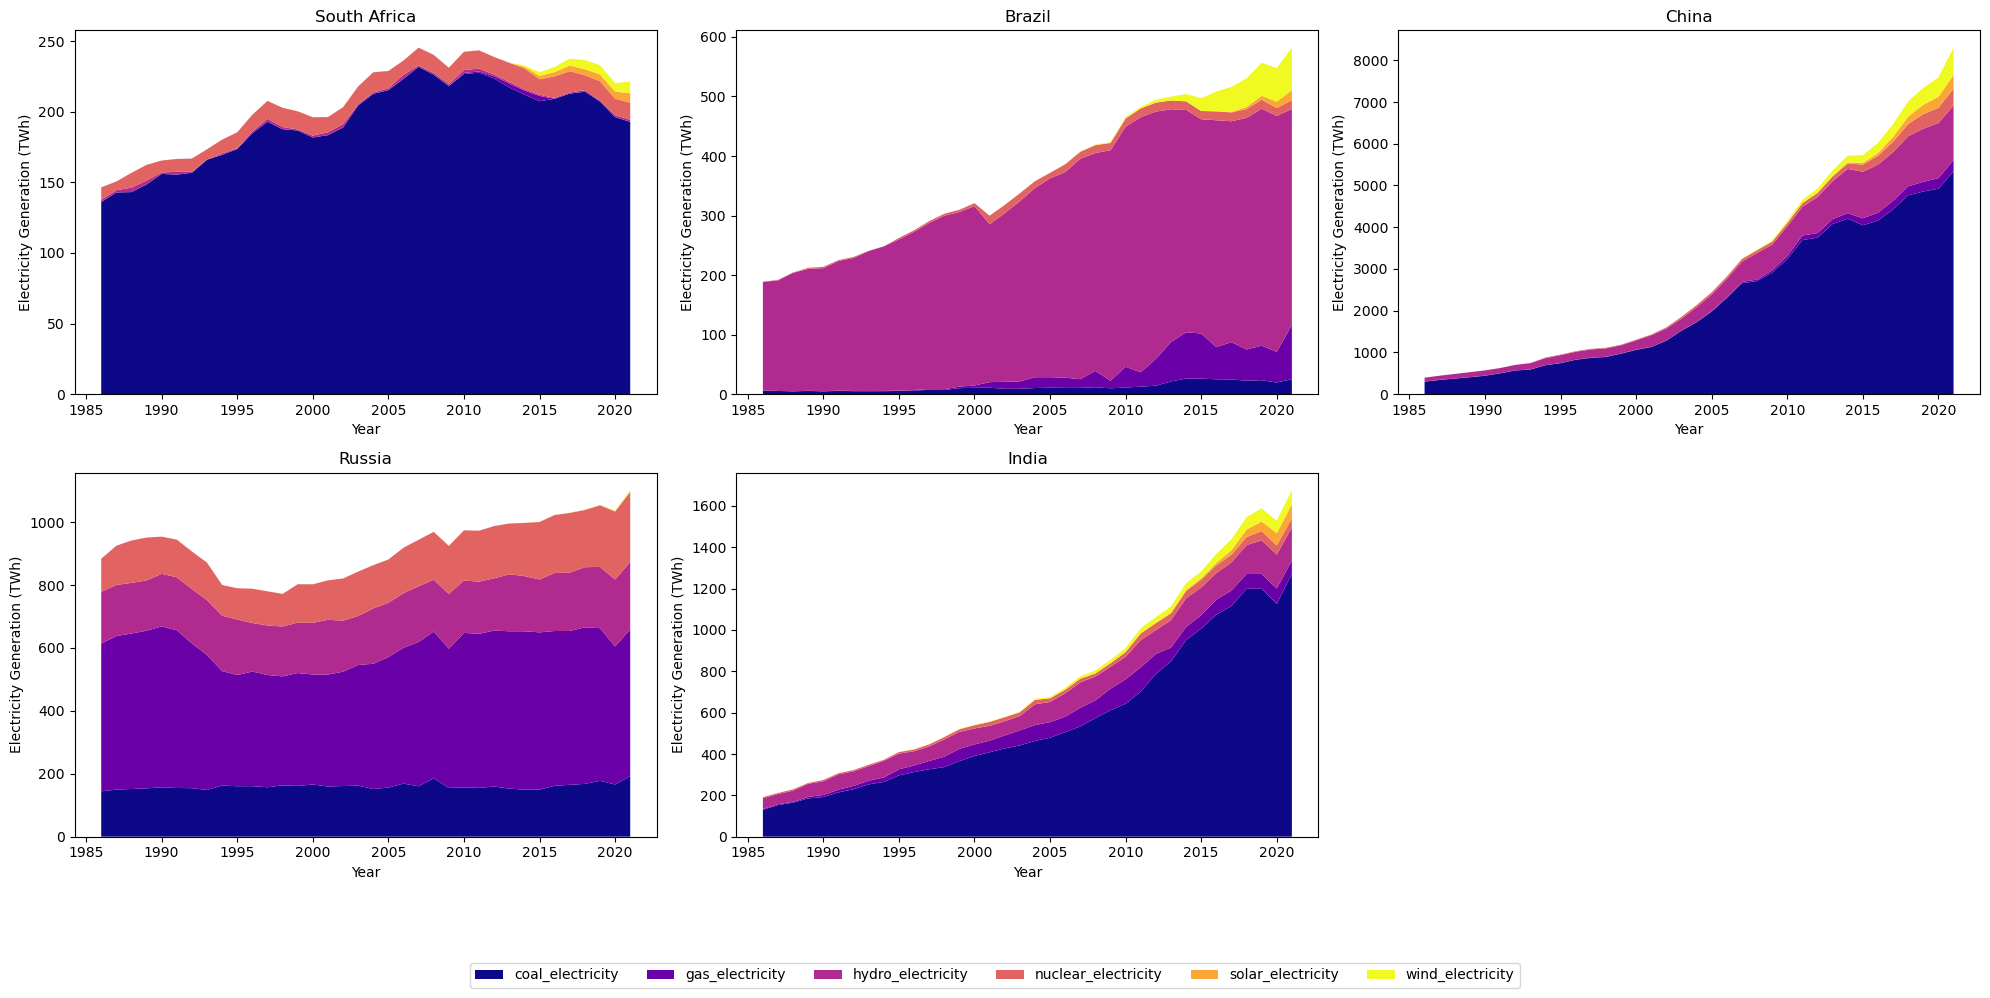

In [70]:
# Creating a new figure and set the size.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
    
# Iterating over the countries and create an area chart for each.
for i, country in enumerate(countries):
    # Get the data for the current country
    country_data = brics_df[brics_df['country'] == country] 

    # Determining the subplot position.
    row = i // num_cols
    col = i % num_cols

    # Plotting the stacked area chart on the corresponding subplot.
    plot = axes[row, col].stackplot(country_data['year'], [country_data[column] for column in energy_sources], labels=energy_sources, colors=colors)
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Electricity Generation (TWh)')
    axes[row, col].set_title(country)

# Removing the extra subplots
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes.flatten()[j])
    
# Creating a single legend for all subplots
fig.legend(labels=energy_sources, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=num_sources)

# Adjusting the spacing between subplots and legend position.
plt.tight_layout(rect=[0, 0, 1, 0.9])

# Show the plot
plt.show()




---

